# Module 9 - Unsupervised Learning - Assignment 2 - K Means (Optimal)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [2]:
data = pd.read_csv('customers-1.csv')
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [4]:
#There are no cells with null values

In [5]:
X = data['Age']
Y = data['Spending Score (1-100)']

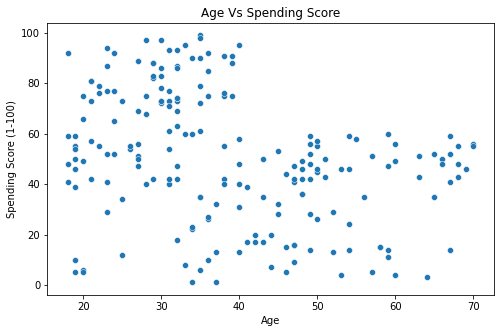

In [6]:
plt.figure(figsize=(8,5))
sns.scatterplot(data = data, x = X, y = Y)
plt.title('Age Vs Spending Score')
plt.show()

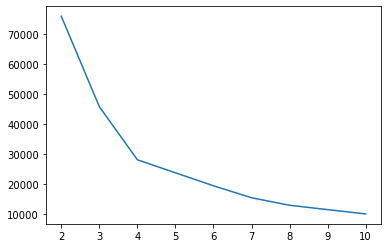

In [7]:
sse = {}
for i in range(2,11):
    kmns = KMeans(n_clusters= i)
    kmns.fit(data[['Age', 'Spending Score (1-100)']])
    error = kmns.inertia_
    sse[i] = error

plt.plot(list(sse.keys()), list(sse.values()))
plt.show()

In [8]:
#Ideally k should be 4

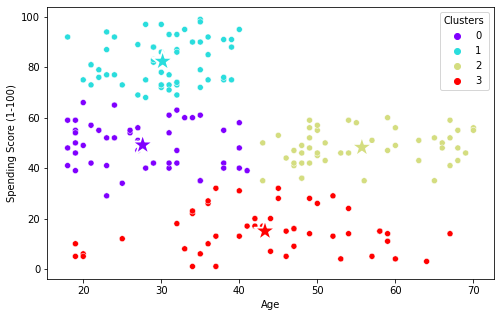

In [9]:
kmns = KMeans(n_clusters= 4)
kmns.fit(data[['Age', 'Spending Score (1-100)']])
centroids = kmns.cluster_centers_
data['Clusters'] = kmns.labels_

plt.figure(figsize=(8,5))
sns.scatterplot(data = data, x = X,  y = Y, hue = 'Clusters', palette = 'rainbow')
sns.scatterplot(x = centroids[:,0], y = centroids[:,1], marker = '*', size = 1, sizes= [500], palette = 'rainbow', hue = range(4), legend = None)
plt.show()